In [9]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.datasets import load_wine # wine dataset
from sklearn.cluster import KMeans, AgglomerativeClustering # clustering algorithms
import plotly.express as px # interactive visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore') # filter warnings

In [10]:
wine = load_wine() # load the wine dataset
wine_data = wine.data # wine data

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42) # K-Means clustering
kmeans_labels = kmeans.fit_predict(wine_data) # apply K-Means clustering
agglomerative = AgglomerativeClustering(n_clusters=3) # Agglomerative clustering
agglomerative_labels = agglomerative.fit_predict(wine_data) # apply Agglomerative clustering

In [12]:
wine_df = pd.DataFrame(wine_data, columns=wine.feature_names) # create a DataFrame
wine_df['K-Means'] = kmeans_labels # add the labels to the DataFrame
wine_df['Agglomerative'] = agglomerative_labels # add the labels to the DataFrame
fig = px.scatter_3d(wine_df, x='alcohol', y='malic_acid', z='flavanoids',
                    color='K-Means', symbol='Agglomerative',
                    labels={'alcohol': 'Alcohol', 'malic_acid': 'Malic Acid', 'flavanoids': 'Flavanoids'},
                    title='Wine Clustering', width=800, height=600, opacity=0.7)
fig.show() # show the interactive visualization

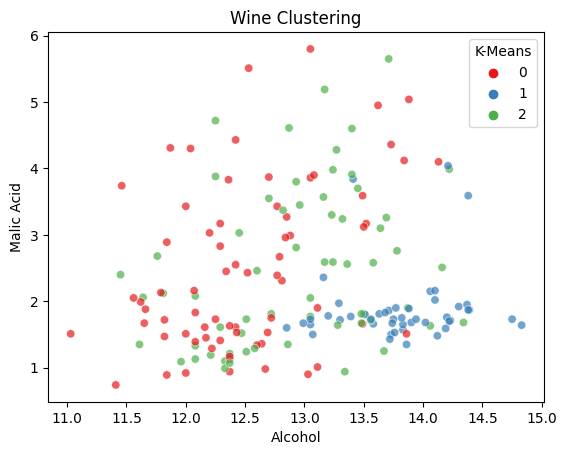

In [13]:
sns.scatterplot(x='alcohol', y='malic_acid', hue='K-Means', data=wine_df, palette='Set1', legend='full', alpha=0.7) # scatter plot
plt.title('Wine Clustering') # title
plt.xlabel('Alcohol') # x-axis label
plt.ylabel('Malic Acid') # y-axis label
plt.show() # show the plot

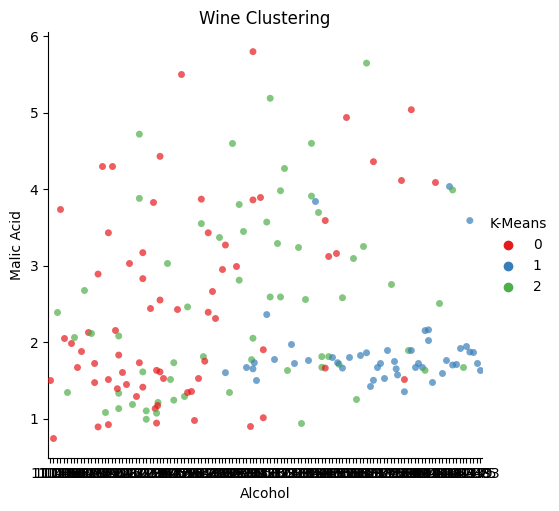

In [14]:
sns.catplot(x='alcohol', y='malic_acid', hue='K-Means', data=wine_df, palette='Set1', legend='full', alpha=0.7, kind='swarm') # swarm plot
plt.title('Wine Clustering') # title
plt.xlabel('Alcohol') # x-axis label
plt.ylabel('Malic Acid') # y-axis label
plt.show() # show the plot

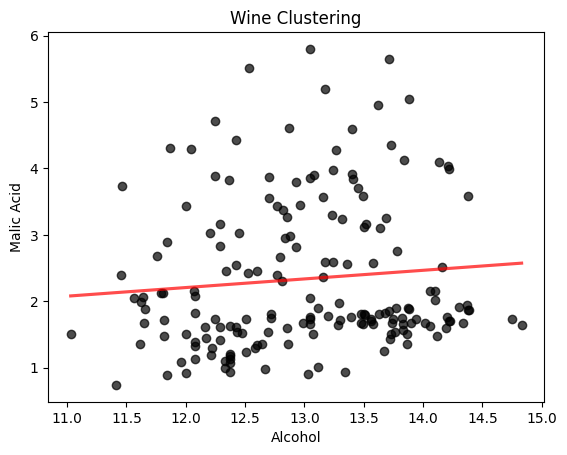

In [15]:
sns.regplot(x='alcohol', y='malic_acid', data=wine_df, scatter_kws={'color': 'black', 'alpha': 0.7}, line_kws={'color': 'red', 'alpha': 0.7}, ci=None) # regression plot
plt.title('Wine Clustering') # title
plt.xlabel('Alcohol') # x-axis label
plt.ylabel('Malic Acid') # y-axis label
plt.show() # show the plot

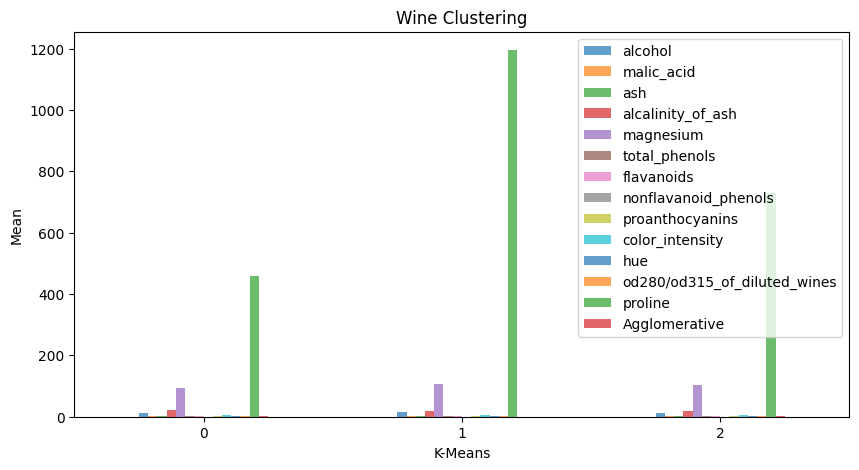

In [19]:
wine_df.groupby('K-Means').mean().plot(kind='bar', figsize=(10, 5), rot=0, alpha=0.7) # bar plot
plt.title('Wine Clustering') # title
plt.xlabel('K-Means') # x-axis label
plt.ylabel('Mean') # y-axis label
plt.show() # show the plot

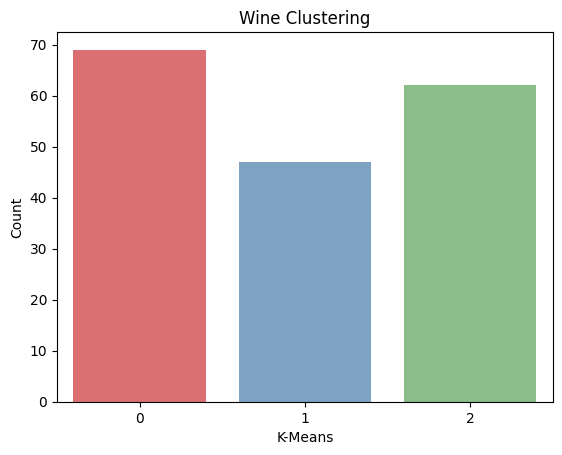

In [21]:
sns.countplot(x='K-Means', data=wine_df, palette='Set1', alpha=0.7) # count plot
plt.title('Wine Clustering') # title
plt.xlabel('K-Means') # x-axis label
plt.ylabel('Count') # y-axis label
plt.show() # show the plot

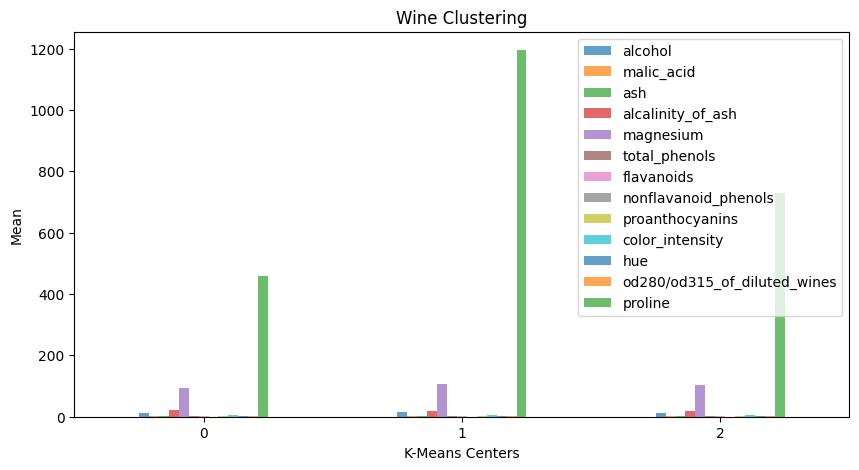

In [24]:
kmeans_centers = kmeans.cluster_centers_ # cluster centers
kmeans_centers_df = pd.DataFrame(kmeans_centers, columns=wine.feature_names) # create a DataFrame
kmeans_centers_df.plot(kind='bar', figsize=(10, 5), rot=0, alpha=0.7) # bar plot
plt.title('Wine Clustering') # title
plt.xlabel('K-Means Centers') # x-axis label
plt.ylabel('Mean') # y-axis label
plt.show() # show the plot

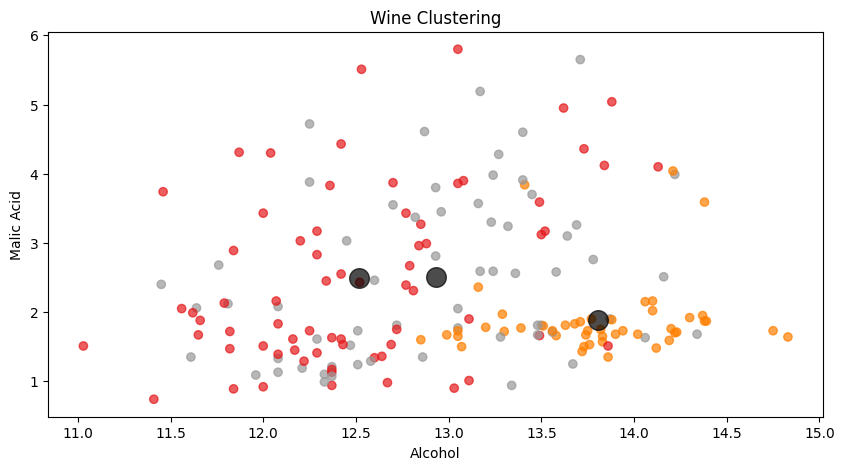

In [25]:
plt.figure(figsize=(10, 5)) # figure size
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], c=kmeans_labels, cmap='Set1', alpha=0.7) # scatter plot
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', s=200, alpha=0.7) # scatter plot
plt.title('Wine Clustering') # title
plt.xlabel('Alcohol') # x-axis label
plt.ylabel('Malic Acid') # y-axis label
plt.show() # show the plot

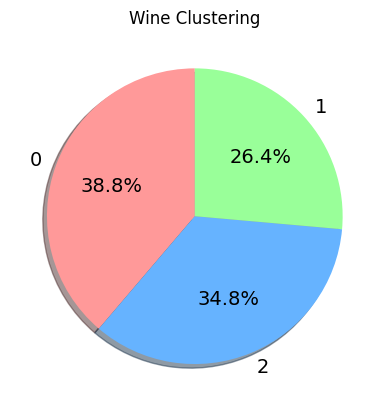

In [28]:
plt.pie(wine_df['K-Means'].value_counts(), labels=wine_df['K-Means'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 14}, colors=['#ff9999', '#66b3ff', '#99ff99']) # pie plot
plt.title('Wine Clustering') # title
plt.show() # show the plot